# Loading Libraries and Dataset

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import time

In [33]:
data= pd.read_csv('cancer.csv')

In [34]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Exploratory Data Analysis

### Separating Targets from Features

In [35]:
#Storing class labels that are targets in the dataset (i.e. values we want to predict)
y= data.diagnosis

#Dropping unecessary columns
drop_cols= ['Unnamed: 32', 'id', 'diagnosis']
x= data.drop(drop_cols, axis=1)

x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Plotting Diagnosis Distributions

Number of Benign Tumors:  357
Number of Malignant Tumors:  212


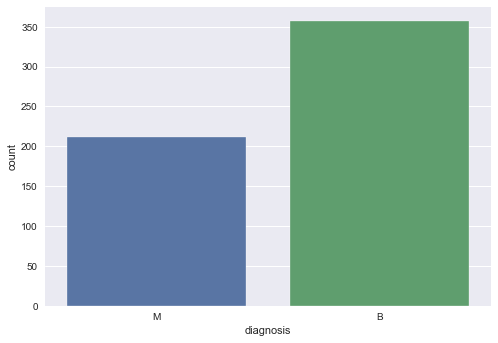

In [36]:
ax= sns.countplot(y, label="Count")
B, M= y.value_counts()
print("Number of Benign Tumors: ", B)
print("Number of Malignant Tumors: ", M)

In [37]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Data Visualization

### Standardizing Data

In [38]:
data= x
data_std= (data - data.mean()) / data.std()

### Violin Plots & Boxplots

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

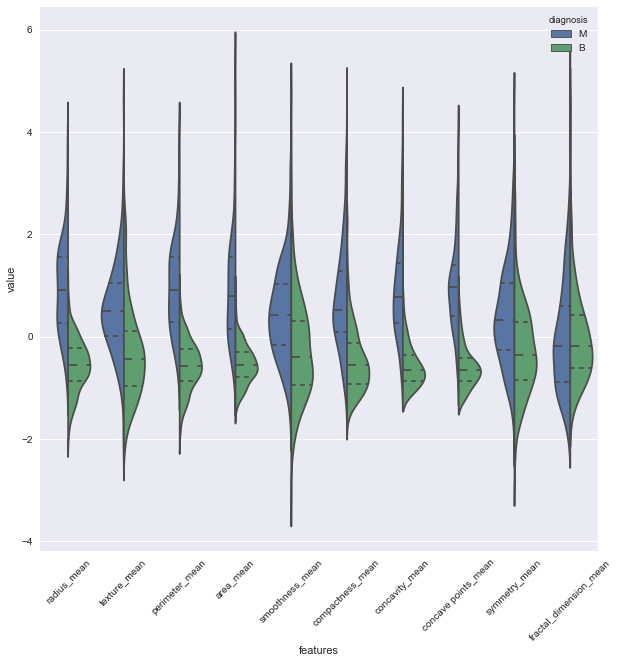

In [39]:
data= pd.concat([y, data_std.iloc[:, 0:10]], axis=1)
data= pd.melt(data, id_vars='diagnosis', var_name='features', value_name='value')

plt.figure(figsize=(10,10))
sns.violinplot(x='features', y='value', hue='diagnosis', data=data, split=True, inner= 'quart')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

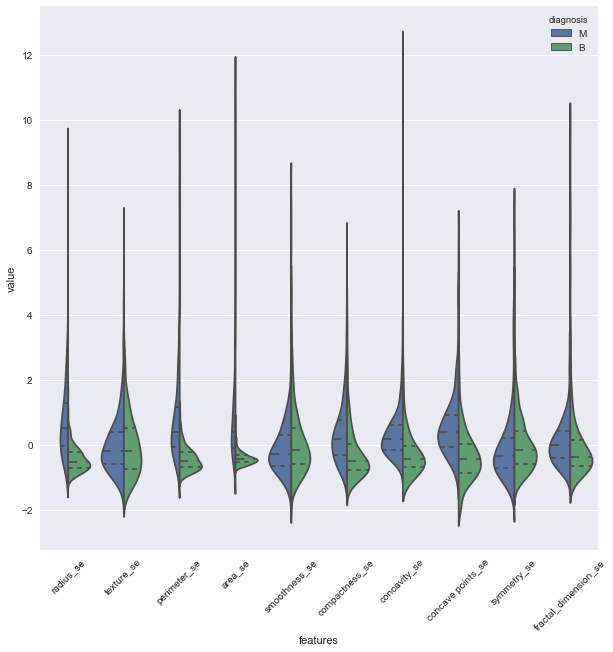

In [40]:
data= pd.concat([y, data_std.iloc[:, 10:20]], axis=1)
data= pd.melt(data, id_vars='diagnosis', var_name='features', value_name='value')

plt.figure(figsize=(10,10))
sns.violinplot(x='features', y='value', hue='diagnosis', data=data, split=True, inner= 'quart')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

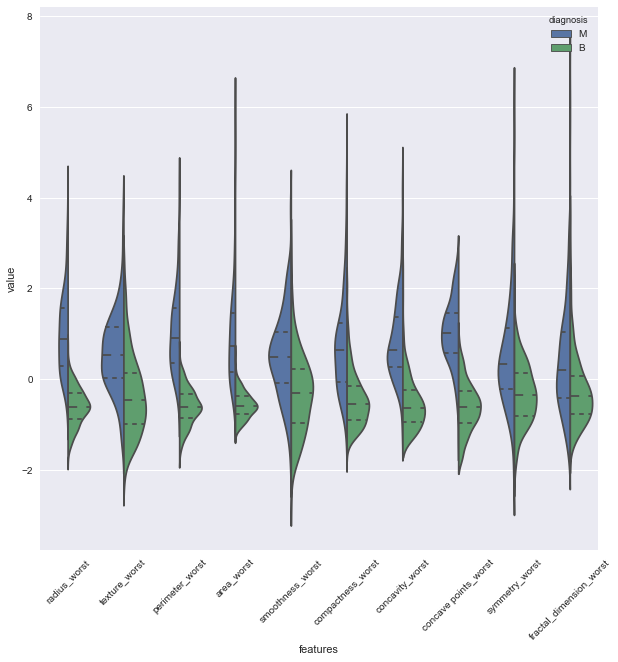

In [41]:
data= pd.concat([y, data_std.iloc[:, 20:30]], axis=1)
data= pd.melt(data, id_vars='diagnosis', var_name='features', value_name='value')

plt.figure(figsize=(10,10))
sns.violinplot(x='features', y='value', hue='diagnosis', data=data, split=True, inner= 'quart')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

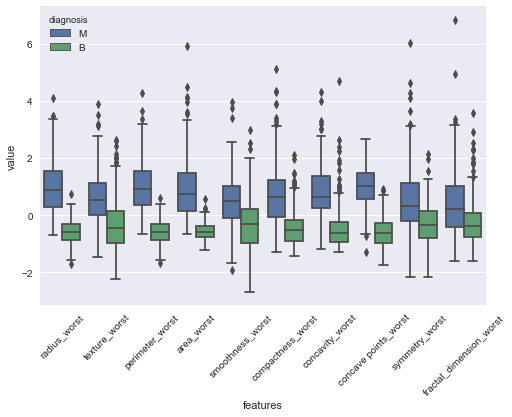

In [42]:
sns.boxplot(x='features', y='value', hue='diagnosis', data=data)
plt.xticks(rotation=45)

### Joint Plots for Feature Comparison

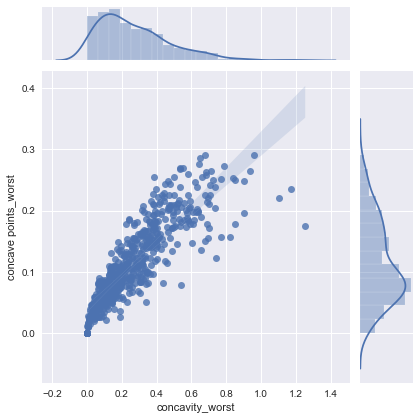

In [43]:
sns.jointplot(x.loc[:, 'concavity_worst'], 
              x.loc[:, 'concave points_worst'], 
              kind= 'regg');

### Observing the Distribution of values and their Variance with Swarm Plots

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

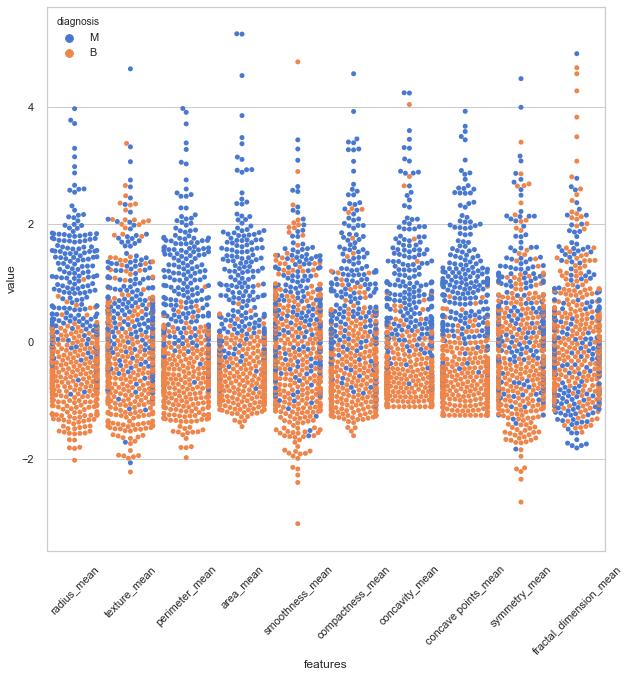

In [44]:
#Customizing seaborn plots
sns.set(style='whitegrid', palette='muted')

#Standardize data
data= x
data_std= (data - data.mean()) / data.std()

#Plot for attributes 0:10
data= pd.concat([y, data_std.iloc[:, 0:10]], axis=1)
data= pd.melt(data, id_vars='diagnosis', var_name='features', value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x='features', y='value', hue='diagnosis', data=data)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

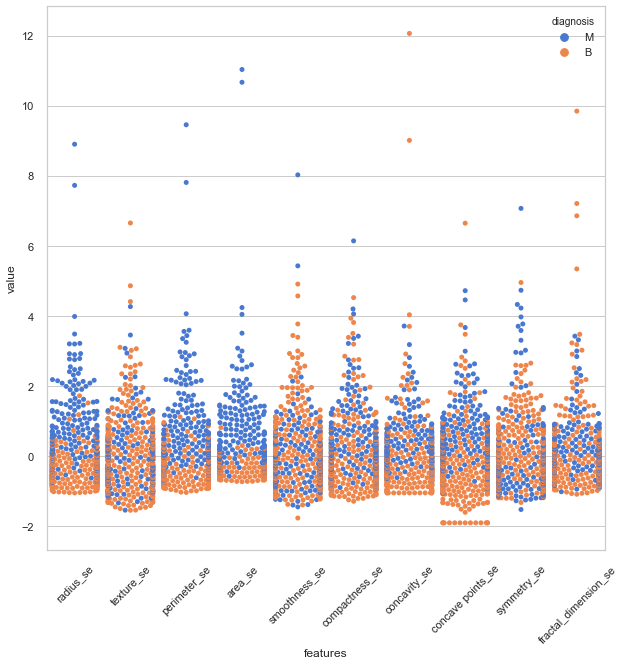

In [45]:
#Customizing seaborn plots
sns.set(style='whitegrid', palette='muted')

#Standardize data
data= x
data_std= (data - data.mean()) / data.std()

#Plot for attributes 10:20
data= pd.concat([y, data_std.iloc[:, 10:20]], axis=1)
data= pd.melt(data, id_vars='diagnosis', var_name='features', value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x='features', y='value', hue='diagnosis', data=data)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

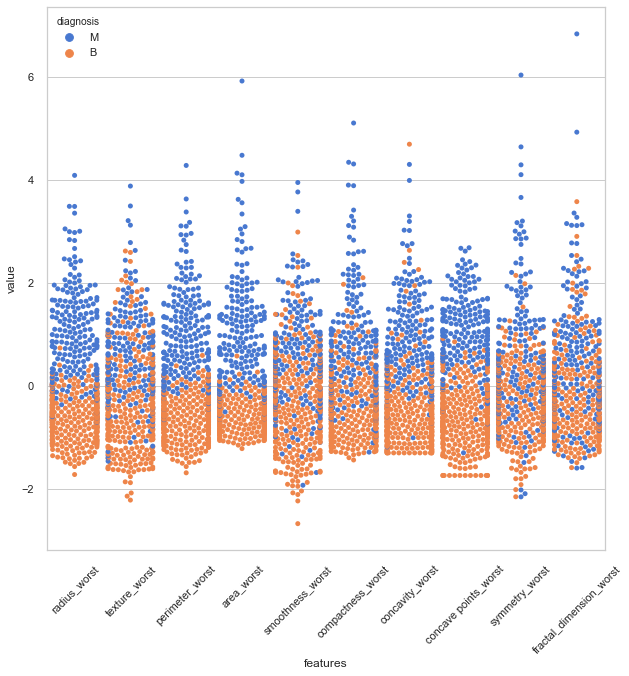

In [46]:
#Customizing seaborn plots
sns.set(style='whitegrid', palette='muted')

#Standardize data
data= x
data_std= (data - data.mean()) / data.std()

#Plot for attributes 20:30
data= pd.concat([y, data_std.iloc[:, 20:30]], axis=1)
data= pd.melt(data, id_vars='diagnosis', var_name='features', value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x='features', y='value', hue='diagnosis', data=data)
plt.xticks(rotation=45)

### Observing Pair-wise Correlations

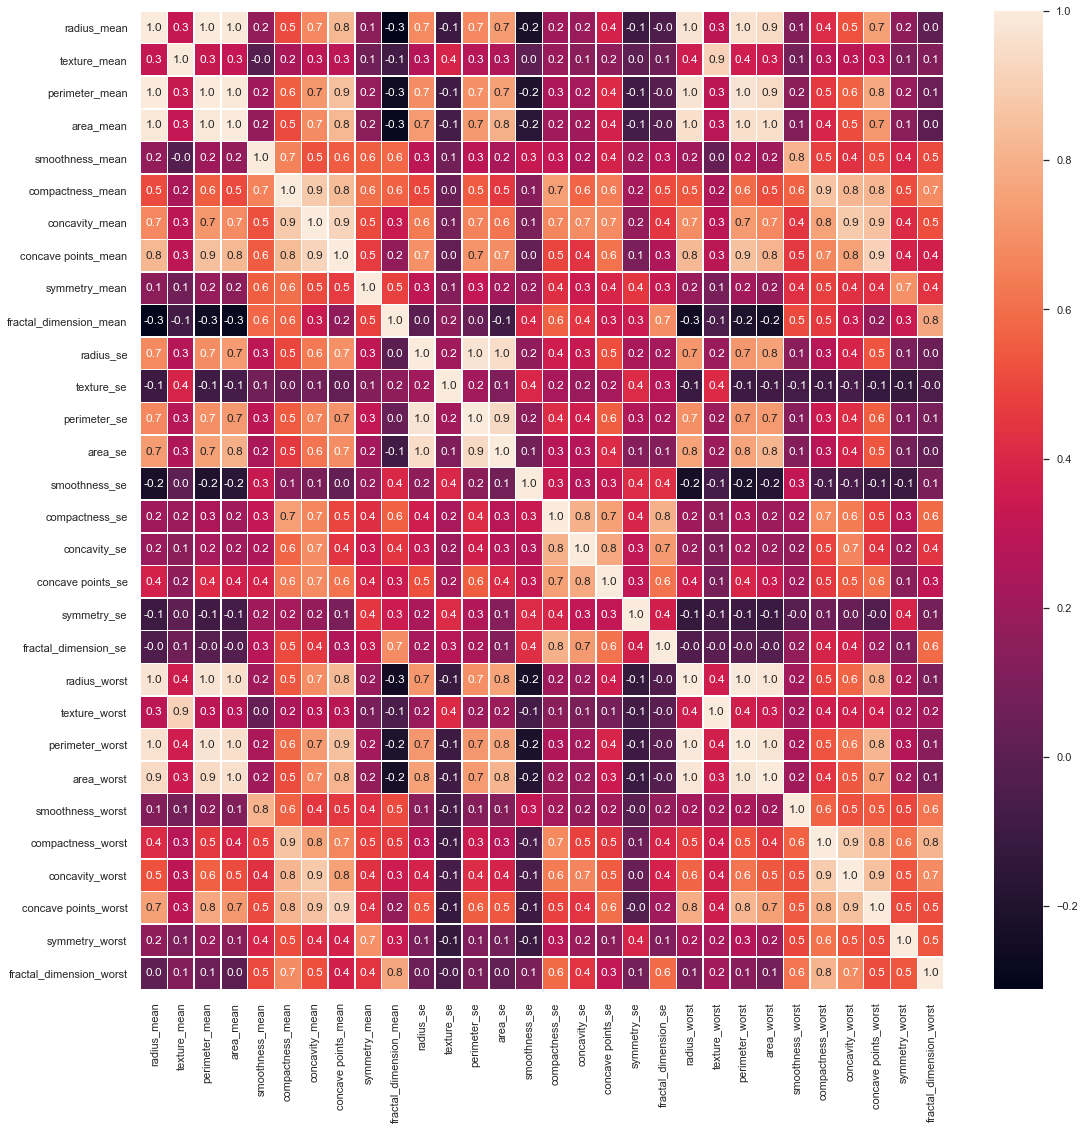

In [47]:
f, ax= plt.subplots(figsize=(18, 18))

#fmt is for precision or rounding off
#linewidth is taken smaller to avoid overlapping of lines due to large qty. of data
sns.heatmap(x.corr(), annot=True, linewidth=.5, fmt= '.1f', ax=ax)

# Feature Selection and Classification

### Dropping Correlated Columns from Feature Matrix

In [50]:
drop_cols= ['perimeter_mean', 'radius_mean', 'compactness_mean', 'concave points_mean', 'radius_se', 
            'perimeter_se', 'radius_worst', 'perimeter_worst', 'compactness_worst', 'concave points_worst', 
            'compactness_se', 'concave points_se', 'texture_worst', 'area_worst']
df= x.drop(drop_cols, axis=1)
df.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


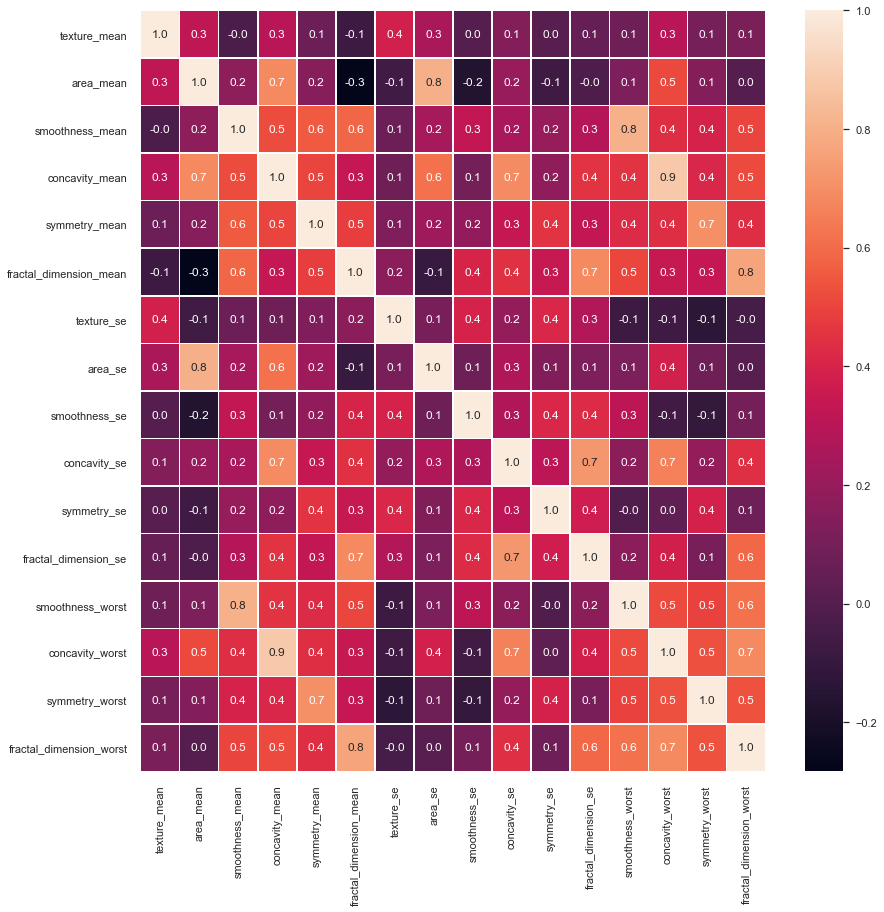

In [52]:
f, ax= plt.subplots(figsize=(14,14))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, fmt='0.1f', ax=ax)

### Classification using XGBoost (Minimal Feature Selection)

In [54]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import accuracy_score

In [63]:
x_train, x_test, y_train, y_test= train_test_split(df, y, test_size=0.3, random_state=42)

clf_1=xgb.XGBClassifier(random_state=42)
clf_1=clf_1.fit(x_train, y_train)

Accuracy is:  0.9766081871345029


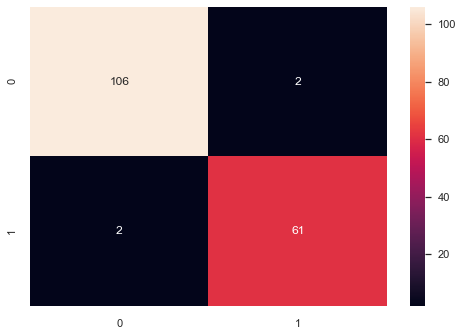

In [64]:
print("Accuracy is: ", accuracy_score(y_test, clf_1.predict(x_test)))
cm= confusion_matrix(y_test, clf_1.predict(x_test))
sns.heatmap(cm, annot=True, fmt='d');

### Univariate Feature Selection and XGBoost

In [58]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [68]:
select_feature= SelectKBest(chi2, k=10).fit(x_train, y_train)

print('Score List: ', select_feature.scores_)
print('\nFeature List: ', x_train.columns)

Score List:  [6.06916433e+01 3.66899557e+04 1.00015175e-01 1.30547650e+01
 1.95982847e-01 3.42575072e-04 4.07131026e-02 6.12741067e+03
 1.32470372e-03 6.92896719e-01 1.39557806e-03 2.65927071e-03
 2.63226314e-01 2.58858117e+01 1.00635138e+00 1.23087347e-01]

Feature List:  Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


Accuracy is:  0.9824561403508771


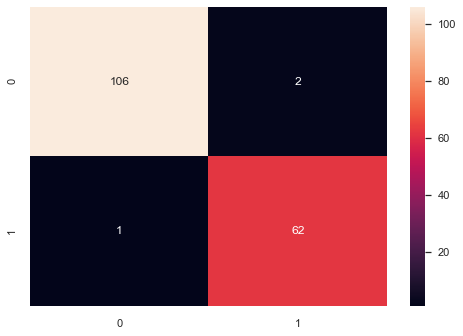

In [69]:
x_train_2= select_feature.transform(x_train)
x_test_2= select_feature.transform(x_test)

clf_2= xgb.XGBClassifier().fit(x_train_2, y_train)

print("Accuracy is: ", accuracy_score(y_test, clf_2.predict(x_test_2)))
cm_2= confusion_matrix(y_test, clf_2.predict(x_test_2))
sns.heatmap(cm_2, annot=True, fmt='d')

### Recursive Feature Elimination with Cross-Validation

In [73]:
from sklearn.feature_selection import RFECV

clf_3= xgb.XGBClassifier()
rfecv= RFECV(estimator=clf_3, step=1, cv=5, scoring='accuracy', n_jobs=-1).fit(x_train, y_train)

print('Optimal no. of features: ', rfecv.n_features_)
print('\nBest features: ', x_train.columns[rfecv.support_])

Optimal no. of features:  14

Best features:  Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'texture_se', 'area_se', 'smoothness_se',
       'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst'],
      dtype='object')


In [75]:
print('Accuracy is: ', accuracy_score(y_test, rfecv.predict(x_test)))

Accuracy is:  0.9824561403508771


[Text(0, 0.5, 'CV Scores'), Text(0.5, 0, 'No. of Selected Features')]

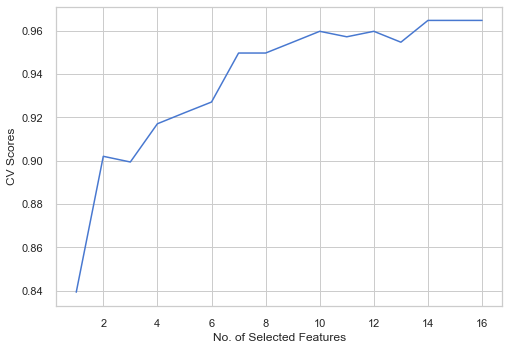

In [76]:
num_features= [i for i in range(1, len(rfecv.grid_scores_)+ 1)]
cv_scores= rfecv.grid_scores_
ax= sns.lineplot(x=num_features, y=cv_scores)
ax.set(xlabel='No. of Selected Features', ylabel='CV Scores')

### Feature Extraction using Principal Component Analysis

In [78]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=42)

x_train_norm= (x_train- x_train.mean())/(x_train.max()- x_train.min())
x_test_norm= (x_test- x_test.mean())/(x_test.max()- x_test.min())

Text(0, 0.5, 'Cumulative Explained Variance')

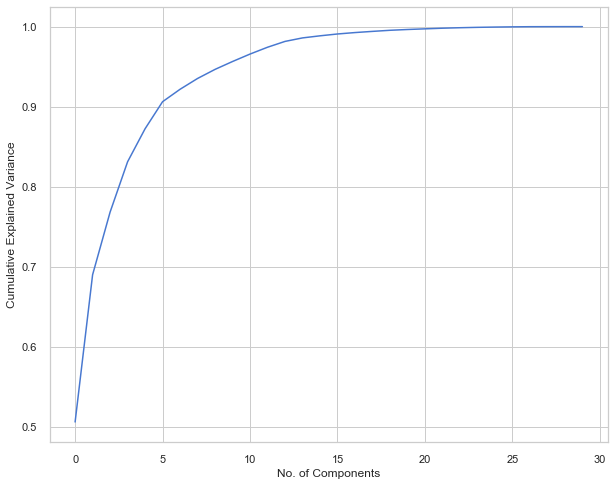

In [79]:
from sklearn.decomposition import PCA

pca= PCA()
pca.fit(x_train_norm)

plt.figure(1, figsize=(10, 8))
sns.lineplot(data=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No. of Components")
plt.ylabel("Cumulative Explained Variance")